In [391]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import squarify
import matplotlib.patches as mpatches
import numpy as np

sys.path.append(os.path.abspath(".."))

from Data.DatabaseConnection import DatabaseConnection
dotenv_path = os.path.abspath("../.env")  
db = DatabaseConnection(dotenv_path)

In [392]:
units = db.get_all_units()
df = pd.DataFrame(units, columns=['id','match_id', 'puuid', 'character_id', 'rarity', 'tier'])
df.head()

,id,match_id,puuid,character_id,rarity,tier
0,1,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT14_NidaleeCougar,0,3
1,2,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT14_Kindred,0,3
2,3,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT14_Poppy,0,3
3,4,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT14_Veigar,1,3
4,5,EUN1_3778549380,teSxaW593i5isCS3TUX-dWR3JbmVaFZ0mc5bqkK1j-TtVn...,TFT14_Shyvana,1,3


In [393]:
print(df.shape)
df.info()
df.describe()

(25862, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            25862 non-null  int64 
 1   match_id      25862 non-null  object
 2   puuid         25862 non-null  object
 3   character_id  25862 non-null  object
 4   rarity        25862 non-null  int64 
 5   tier          25862 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


,id,rarity,tier
count,25862.000000,25862.000000,25862.000000
mean,17368.238033,2.325961,1.974905
std,9540.787110,1.974864,0.612273
min,1.000000,0.000000,1.000000
25%,10331.750000,1.000000,2.000000
50%,17894.500000,2.000000,2.000000
75%,24637.750000,4.000000,2.000000
max,36069.000000,9.000000,4.000000


In [394]:
df.duplicated().sum()
df.isnull().sum()

id              0
match_id        0
puuid           0
character_id    0
rarity          0
tier            0
dtype: int64

In [395]:
df[df['tier'] > 3].shape[0]
df = df[df['tier'] <= 3]

In [396]:
df['champion'] = df['character_id'].str.replace(r'^TFT\d+_', '', regex=True)

In [397]:
players = db.get_all_players()
players_df = pd.DataFrame(players, columns=[
    'puuid', 'match_id', 'placement', 'level', 'gold_left', 'last_round',
    'players_eliminated', 'time_eliminated', 'total_damage', 'companion_id',
    'tier', 'division', 'leaguepoints', 'wins', 'losses'
])

df = df.merge(players_df, on=['match_id', 'puuid'], how='left')

print(df.columns)


Index(['id', 'match_id', 'puuid', 'character_id', 'rarity', 'tier_x',
       'champion', 'placement', 'level', 'gold_left', 'last_round',
       'players_eliminated', 'time_eliminated', 'total_damage', 'companion_id',
       'tier_y', 'division', 'leaguepoints', 'wins', 'losses'],
      dtype='object')


In [398]:
champion_summary = df.groupby(['champion', 'rarity']).size().reset_index(name='count')
champion_summary = champion_summary.sort_values(by='count', ascending=False)
champion_summary.head(10)


,champion,rarity,count
60,Mordekaiser,2,715
35,Jarvan,2,666
38,Jhin,1,643
78,Sejuani,4,586
53,Leona,4,567
74,Rhaast,1,552
18,DrMundo,0,544
85,Shyvana,1,541
31,Gragas,2,533
9,Aurora,6,504


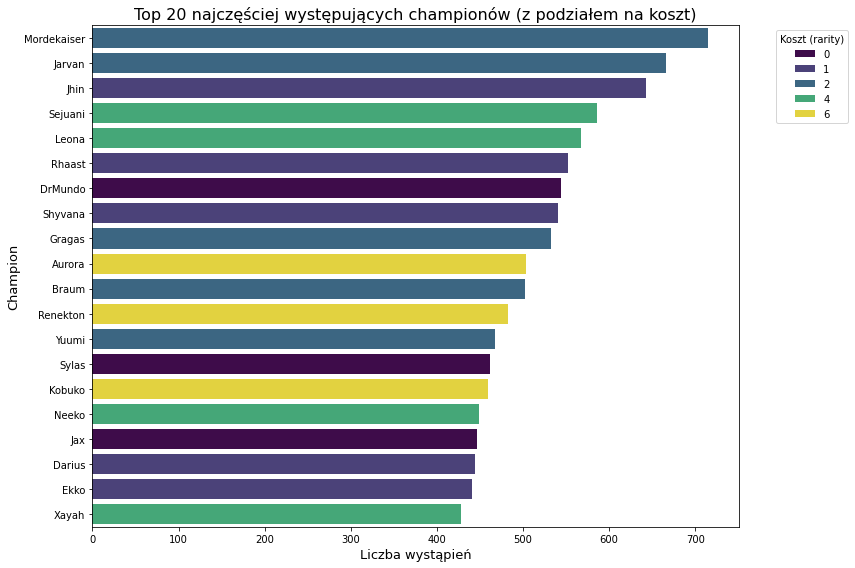

In [399]:
top_champs = champion_summary.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_champs, y='champion', x='count', hue='rarity', dodge=False, palette='viridis')

plt.title("Top 20 najczęściej występujących championów (z podziałem na koszt)", fontsize=16)
plt.xlabel("Liczba wystąpień", fontsize=13)
plt.ylabel("Champion", fontsize=13)
plt.legend(title="Koszt (rarity)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Wykres pokazuje 20 najczęściej wybieranych championów, wśród których dominują postacie takie jak Mordekaiser, Jarvan i Jhin. Ich popularność sugeruje, że są silni lub dobrze pasują do wielu kompozycji. Co ważne, pojawiają się tu zarówno tanie, jak i drogie jednostki, co oznacza, że gracze chętnie sięgają po kosztowniejsze postacie, jeśli są one efektywne. 

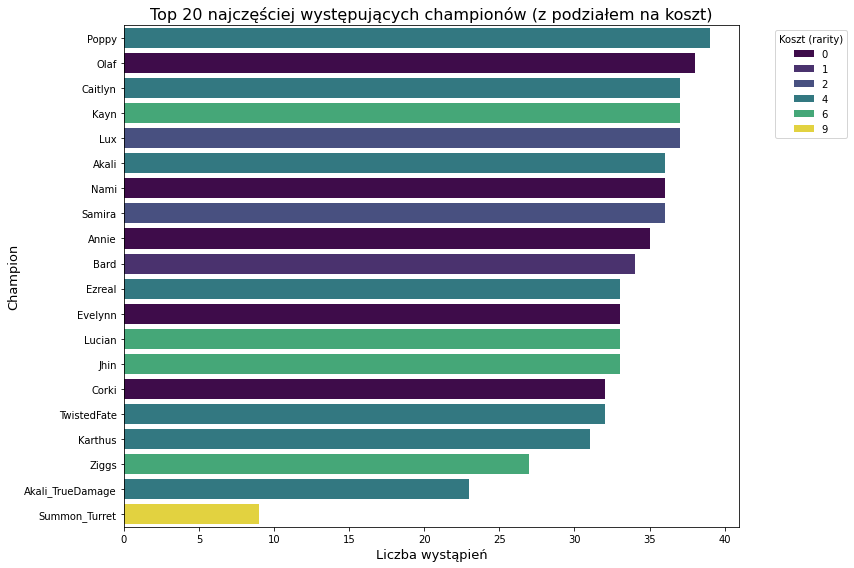

In [400]:
top_champs = champion_summary.tail(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_champs, y='champion', x='count', hue='rarity', dodge=False, palette='viridis')

plt.title("Top 20 najczęściej występujących championów (z podziałem na koszt)", fontsize=16)
plt.xlabel("Liczba wystąpień", fontsize=13)
plt.ylabel("Champion", fontsize=13)
plt.legend(title="Koszt (rarity)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Ten wykres przedstawia 20 najrzadziej wybieranych championów w grze. Wśród nich znajdują się głównie tanie jednostki (o niskim koszcie rarity), co może sugerować ich niską skuteczność lub ograniczoną przydatność w obecnej mecie. Na uwagę zasługuje obecność jednostek specjalnych, takich jak "Summon\_Turret" czy "Akali\_TrueDamage", które mogą być sytuacyjne lub unikalne. Te postacie wydają się mniej atrakcyjne dla graczy – być może przez słabe umiejętności, trudną dostępność lub niski wpływ na przebieg rozgrywki.

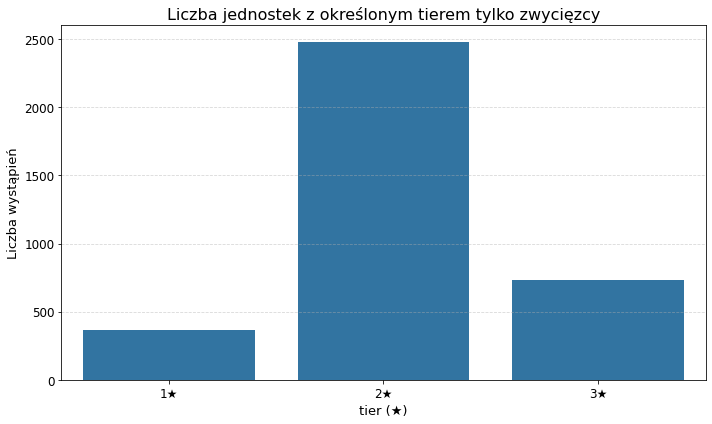

In [401]:
winners_df = df[df['placement'] == 1]

tier_counts = winners_df['tier_x'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=tier_counts.index, y=tier_counts.values)

plt.title("Liczba jednostek z określonym tierem tylko zwycięzcy", fontsize=16)
plt.xlabel("tier (★)", fontsize=13)
plt.ylabel("Liczba wystąpień", fontsize=13)
plt.xticks([0, 1, 2], ['1★', '2★', '3★'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Wykres pokazuje, z jakimi jednostkami gracze kończą grę na 1. miejscu. Najwięcej z nich to postacie 2★, co sugeruje, że to one stanowią stabilną podstawę zwycięskich kompozycji. Gracze ulepszają jednostki 1★ do 2★, ale rzadziej inwestują dalej w poziom 3★. Może to wynikać z faktu, że zamiast skupiać się na maksymalnym ulepszaniu pojedynczych jednostek, gracze wolą rozbudowywać szerzej swoją kompozycję — rozwijać synergie (traits), kontrolować ekonomię i dostosowywać się do sytuacji w grze. W praktyce oznacza to, że 2★ to najbardziej efektywny i realistyczny poziom jednostki w drodze po zwycięstwo.

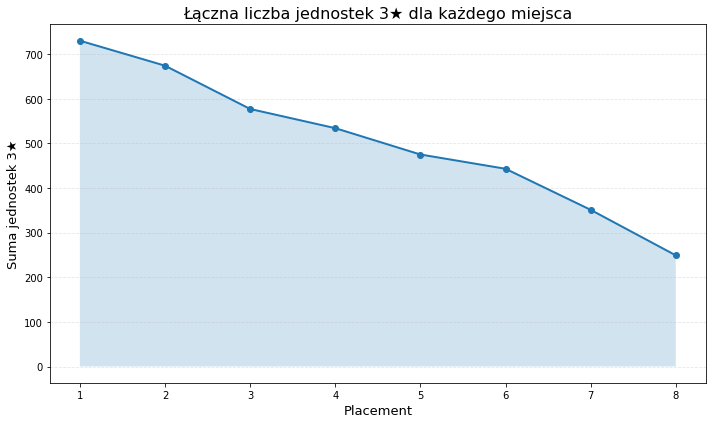

In [402]:
df['is_3star'] = df['tier_x'] == 3

three_star_counts = df[df['is_3star']].groupby(['match_id', 'puuid']).size().reset_index(name='three_star_count')

placement_df = df[['match_id', 'puuid', 'placement']].drop_duplicates()

merged = pd.merge(three_star_counts, placement_df, on=['match_id', 'puuid'], how='right').fillna(0)
merged['three_star_count'] = merged['three_star_count'].astype(int)
merged['placement'] = merged['placement'].astype(int)

sum_by_placement = merged.groupby('placement')['three_star_count'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sum_by_placement['placement'], sum_by_placement['three_star_count'], marker='o', linewidth=2)
plt.fill_between(sum_by_placement['placement'], sum_by_placement['three_star_count'], alpha=0.2)

plt.title("Łączna liczba jednostek 3★ dla każdego miejsca", fontsize=16)
plt.xlabel("Placement", fontsize=13)
plt.ylabel("Suma jednostek 3★", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(sum_by_placement['placement'])
plt.tight_layout()
plt.show()


Wykres przedstawia zależność między miejscem zajętym przez gracza a łączną liczbą posiadanych jednostek na poziomie 3★. Zauważalna jest wyraźna tendencja – im wyższe miejsce, tym więcej graczy miało jednostki na maksymalnym poziomie.

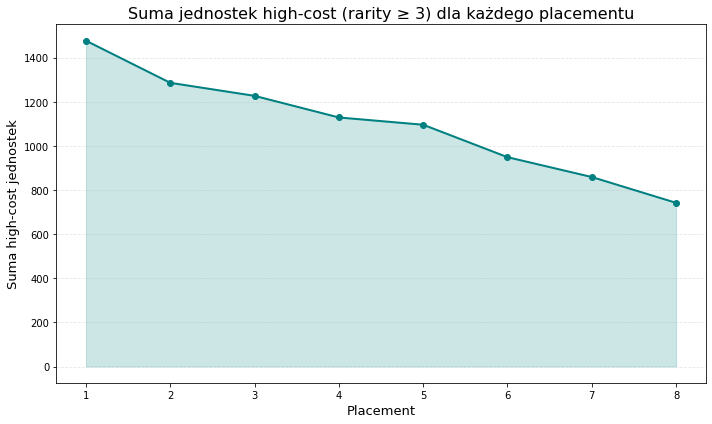

In [403]:
df['is_high_cost'] = df['rarity'] >= 3
high_cost_counts = df[df['is_high_cost']].groupby(['match_id', 'puuid']).size().reset_index(name='high_cost_count')

placement_df = df[['match_id', 'puuid', 'placement']].drop_duplicates()
merged_high_cost = pd.merge(high_cost_counts, placement_df, on=['match_id', 'puuid'], how='right').fillna(0)
merged_high_cost['high_cost_count'] = merged_high_cost['high_cost_count'].astype(int)
merged_high_cost['placement'] = merged_high_cost['placement'].astype(int)

sum_high_cost = merged_high_cost.groupby('placement')['high_cost_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sum_high_cost['placement'], sum_high_cost['high_cost_count'], marker='o', linewidth=2, color='teal')
plt.fill_between(sum_high_cost['placement'], sum_high_cost['high_cost_count'], alpha=0.2, color='teal')

plt.title("Suma jednostek high-cost (rarity ≥ 3) dla każdego placementu", fontsize=16)
plt.xlabel("Placement", fontsize=13)
plt.ylabel("Suma high-cost jednostek", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(sum_high_cost['placement'])
plt.tight_layout()
plt.show()


Wykres pokazuje łączną liczbę jednostek high-cost (koszt ≥ 3), używanych przez graczy na różnych miejscach. Widać wyraźnie, że najlepsi gracze (1–3 miejsce) znacznie częściej korzystają z droższych jednostek. Sugeruje to, że dostęp do high-cost championów może być istotnym czynnikiem wpływającym na końcowy sukces w grze.

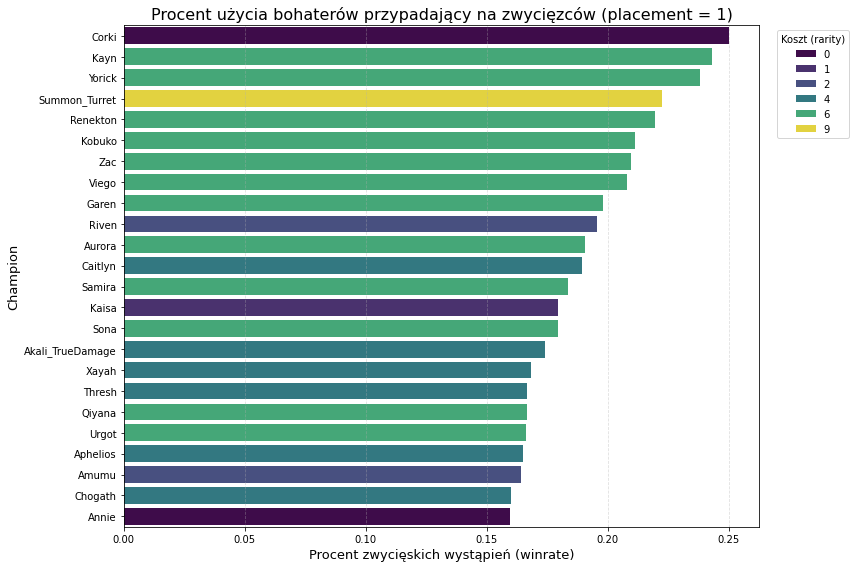

In [404]:
total_champ_counts = df.groupby('champion').size().reset_index(name='total_count')

win_champ_counts = df[df['placement'] == 1].groupby('champion').size().reset_index(name='win_count')

champ_winrate = pd.merge(total_champ_counts, win_champ_counts, on='champion', how='left').fillna(0)
champ_winrate['winrate'] = champ_winrate['win_count'] / champ_winrate['total_count']
rarity_map = df[['champion', 'rarity']].drop_duplicates()

champ_winrate = pd.merge(champ_winrate, rarity_map, on='champion', how='left')

top_champ_winrate = champ_winrate.sort_values(by='winrate', ascending=False).head(30)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_champ_winrate,
    x='winrate',
    y='champion',
    hue='rarity',
    dodge=False,
    palette='viridis'
)

plt.title("Procent użycia bohaterów przypadający na zwycięzców (placement = 1)", fontsize=16)
plt.xlabel("Procent zwycięskich wystąpień (winrate)", fontsize=13)
plt.ylabel("Champion", fontsize=13)
plt.legend(title="Koszt (rarity)", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Ten wykres przedstawia, jaki procent wszystkich wystąpień danego bohatera przypada na graczy, którzy zajęli 1. miejsce (czyli tzw. "winrate jednostki"). Najwyżej są się postacie takie jak Corki i Kayn, które – mimo że nie należą do najdroższych – często pojawiają się u zwycięzców. Zaskakujący jest Summon_Turret, który pomimo rzadkości (koszt 9), pojawia się wyjątkowo często w zwycięskich kompozycjach.
Warto też zauważyć, że wiele tanich jednostek (koszt 1–2) również ma wysoki udział w zwycięskich teamach co może wynikać z ich dostępności

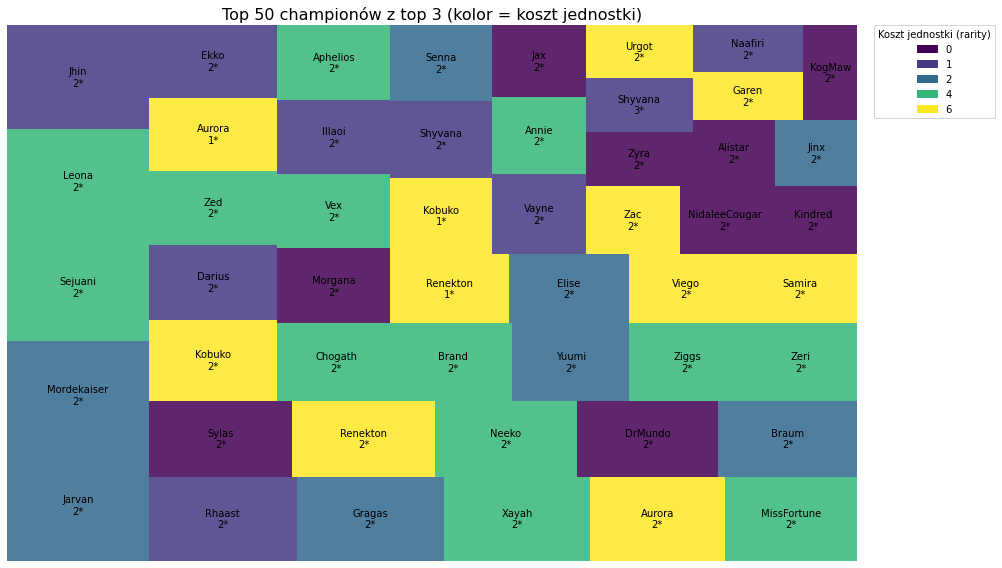

In [405]:
top4_df = df[df['placement'] <= 3]

champ_table_top4 = top4_df.groupby(['champion', 'rarity', 'tier_x']).size().reset_index(name='count')

treemap_data = champ_table_top4.sort_values(by='count', ascending=False).head(50)

labels = [f"{row['champion']}\n{row['tier_x']}*" for _, row in treemap_data.iterrows()]

rarity = treemap_data['rarity']
colors = plt.cm.viridis(rarity / rarity.max())

fig, ax = plt.subplots(figsize=(14, 8))

squarify.plot(
    sizes=treemap_data['count'],
    label=labels,
    color=colors,
    alpha=0.85,
    ax=ax
)

plt.title("Top 50 championów z top 3 (kolor = koszt jednostki)", fontsize=16)
plt.axis('off')

unique_rarities = sorted(treemap_data['rarity'].unique())
legend_colors = [plt.cm.viridis(r / rarity.max()) for r in unique_rarities]
legend_labels = [str(r) for r in unique_rarities]
patches = [mpatches.Patch(color=c, label=l) for c, l in zip(legend_colors, legend_labels)]

plt.legend(
    handles=patches,
    title='Koszt jednostki (rarity)',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

plt.tight_layout()
plt.show()


W treemapie widać, że gracze z top 3 najczęściej korzystają z jednostek o koszcie 2 i 4, co sugeruje, że są one fundamentem skutecznych kompozycji. Co ciekawe, większość tych championów osiąga poziom 2★, co oznacza, że są ulepszani, ale rzadko maksowani do 3★. Jednostki z kosztu 6 (najdroższe) również są obecne w dużej ilości i osiągają 2★. Z kolei tanie jednostki (koszt 0–1) pojawiają się rzadziej i zwykle w roli uzupełniającej.

tier_y
GOLD           4646
PLATINUM       4347
SILVER         4170
DIAMOND        3329
UNRANKED       3258
EMERALD        2669
BRONZE         1954
MASTER          864
IRON            406
GRANDMASTER      53
Name: count, dtype: int64


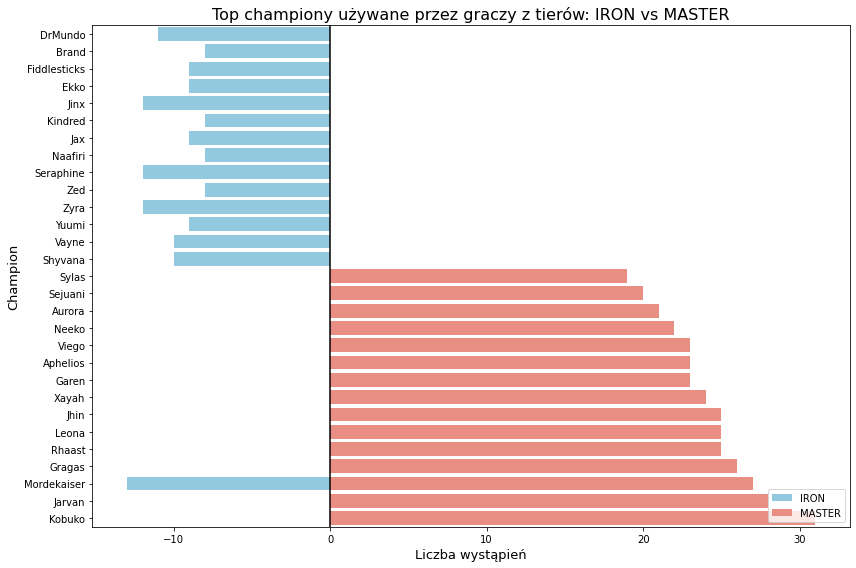

In [406]:
print(df['tier_y'].value_counts())

tier_low = 'IRON'
tier_high = 'MASTER'

low_tier_df = df[df['tier_y'] == tier_low]
high_tier_df = df[df['tier_y'] == tier_high]

top_low = low_tier_df['champion'].value_counts().head(15).reset_index()
top_low.columns = ['champion', 'count_low']

top_high = high_tier_df['champion'].value_counts().head(15).reset_index()
top_high.columns = ['champion', 'count_high']

merged_tiers = pd.merge(top_low, top_high, on='champion', how='outer').fillna(0)

merged_tiers['count_low'] = -merged_tiers['count_low']

merged_tiers = merged_tiers.sort_values(by='count_high', ascending=True)

plt.figure(figsize=(12, 8))

sns.barplot(data=merged_tiers, x='count_low', y='champion', color='skyblue', label=tier_low)

sns.barplot(data=merged_tiers, x='count_high', y='champion', color='salmon', label=tier_high)

plt.axvline(0, color='black')
plt.xlabel("Liczba wystąpień", fontsize=13)
plt.ylabel("Champion", fontsize=13)
plt.title(f"Top championy używane przez graczy z tierów: {tier_low} vs {tier_high}", fontsize=16)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



Na wykresie widać wyraźny kontrast między tym, jakich championów wybierają gracze z tieru IRON, a jakich używają gracze z MASTER. Postacie takie jak Jarvan, Gragas, Rhaast czy Mordekaiser są bardzo popularne wśród graczy z MASTER, podczas gdy gracze z IRON praktycznie w ogóle po nie nie sięgają. Z drugiej strony, bohaterowie tacy jak DrMundo, Yuumi czy Seraphine pojawiają się głównie u graczy z najniższego poziomu i są zupełnie pomijani przez tych z wyższych tierów. Pokazuje to, że lepsi gracze znacznie częściej wybierają konkretne, silniejsze jednostki, co może być jednym z powodów ich sukcesu.